In [1]:
import matplotlib.pylab as pylab
%matplotlib inline
from scipy.integrate import odeint
from pylab import plot,xlabel,ylabel,title,legend,figure,subplots
from pylab import cos, pi, arange, sqrt, pi, array, array
import pandas as pd

In [167]:
def main_simulacion():  
  numero_rebote, ya_reboto = 0, False
  tiempo, posicion, velocidad = 0, 10, 0

  x, xd, t, ya_reboto = ecuacion_x_MAYOR_cero(posicion, velocidad, tiempo, ya_reboto)
  df_acumulador, tiempo, posicion, velocidad = recortesSegmentos(t,x,xd,ya_reboto)

  while(numero_rebote < 3):
    if(ya_reboto == True):
      x, xd, t, ya_reboto = ecuacion_x_MAYOR_cero(posicion, velocidad, tiempo, ya_reboto)
      df_iterador, tiempo, posicion, velocidad = recortesSegmentos(t,x,xd,ya_reboto)
      df_acumulador = df_acumulador.append(df_iterador,ignore_index=True)
    else:
      x, xd, t, ya_reboto = ecuacion_x_MENOR_cero(0, velocidad, tiempo, ya_reboto)
      df_iterador, tiempo, posicion, velocidad = recortesSegmentos(t,x,xd,ya_reboto)
      numero_rebote += 1
      df_acumulador = df_acumulador.append(df_iterador,ignore_index=True)
  graficadora(df_acumulador)
  
  return df_acumulador

In [193]:
def ecuacion_x_MAYOR_cero(x_0, v_0, t_ini, ya_reboto_temporal):
  
  state0 = [x_0, v_0]  #initial conditions [x0 , v0]  [m, m/sec] 
  ti = t_ini  # initial time
  tf = t_ini + 5  # final time
  step = 0.001  # step
  t_temporal = arange(ti, tf, step)
  state = odeint(ecuacion_1, state0, t_temporal)
  x_temporal = array(state[:,0])
  xd_temporal = array(state[:,1])
  ya_reboto_temporal = False

  return x_temporal, xd_temporal, t_temporal, ya_reboto_temporal

In [197]:
def ecuacion_x_MENOR_cero (x_0, v_0, t_ini, ya_reboto_temporal):

  state0 = [x_0, v_0]  #initial conditions [x0 , v0]  [m, m/sec] 
  ti = t_ini  # initial time
  tf = t_ini + 2  # final time
  step = 0.001  # step
  t_temporal = arange(ti, tf, step)
  state = odeint(ecuacion_2, state0, t_temporal)
  x_temporal = array(state[:,0])
  xd_temporal = array(state[:,1])
  ya_reboto_temporal = True

  return x_temporal, xd_temporal, t_temporal, ya_reboto_temporal

In [196]:
def recortesSegmentos(time,position,speed,ya_reboto_temporal):

  list_of_tuples = zip(time,position,speed)
  df_temporal = pd.DataFrame(list_of_tuples, columns = ['tiempo','posicion','velocidad'])
  indice_recorte, last_position, last_speed = 0, 0, 0

  for i in df_temporal.itertuples():
    if((i[2] <= -0.002 and ya_reboto_temporal is False) or (i[2] >= 0.002 and ya_reboto_temporal == True)):
      indice_recorte = i[0]
      last_time =  i[1]
      last_position =  i[2]
      last_speed = i[3]
      break

  return df_temporal[0:indice_recorte], last_time, last_position, last_speed

In [148]:
def ecuacion_1(state,t):
    '''
    k=spring constant, Newtons per metre
    m=mass, Kilograms   
    
    for a mass, spring, damper 
        xdd = -ba/m * xd - g
    '''
    ba = 0.1  # 
    m = 1.0 # mass, Kg
    g = 9.8 # metres per second**2
    
    return [state[1], (ba/m)*state[1] - g]

In [149]:
def ecuacion_2(state,t):
    '''
    k=spring constant, Newtons per metre
    m=mass, Kilograms
    c=dampign coefficient, Newton*second / meter    
    
    for a mass, spring, damper 
        xdd = -k*x/m -c*xd-g
    '''
    k=100000  # spring constant, kN/m
    m=1 # mass, Kg
    c=30  # damping coefficient 
    # unpack the state vector
    x,xd = state # displacement,x and velocity x'
    g = 9.8 # metres per second**2
    xdd = -k*x/m -c*xd-g 
    
    return [xd, xdd]

In [203]:
def graficadora(dataframe_grafica):
  # Plotting displacement and velocity
  pylab.rcParams['figure.figsize'] = (14, 10)
  pylab.rcParams['font.size'] = 18

  fig, ax1 = pylab.subplots()
  ax2 = ax1.twinx()
  ax1.plot(dataframe_grafica['tiempo'],dataframe_grafica['posicion'],'b',label = r'$x (mm)$', linewidth=2.0)
  ax2.plot(dataframe_grafica['tiempo'],dataframe_grafica['velocidad'],'g--',label = r'$xd (m/sec)$', linewidth=2.0)
  ax2.legend(loc='lower right')
  ax1.legend()
  ax1.set_xlabel('time , sec')
  ax1.set_ylabel('disp (mm)',color='b')
  pylab.title('Simulación de sistemas continuos $V_0=0 \frac{m}{s}$ and $x_0=10mm$')
  pylab.grid()


x=10, xd=0, t=0
0
False
x=-0.00950581701446318, xd=-14.681750581701447, t=1.3960000000000001
x=-0.00950581701446318, xd=-14.681750581701447, t=1.3960000000000001
------comenzooooooooo-------
x=0.012704464421569455, xd=11.580089698663604, t=1.406999999999999
------REBOTE-------
1
True
x=0.012704464421569455, xd=11.580089698663604, t=1.406999999999999,
1
False
x=-0.007390283585885005, xd=-12.588719776134466, t=3.8729999999997275
x=0.010867965756631136, xd=9.930457607536574, t=3.8839999999997263
------REBOTE-------
2
True
x=0.010867965756631136, xd=9.930457607536574, t=3.8839999999997263,
2
False
x=-0.009650842996465854, xd=-10.671194273336434, t=5.985999999999494
x=0.009185461600571805, xd=8.419150849435033, t=5.996999999999498
------REBOTE-------
3
True
x=0.009185461600571805, xd=8.419150849435033, t=5.996999999999498,


,tiempo,posicion,velocidad
0,0.000,10.000000,0.000000
1,0.001,9.999995,-0.009800
2,0.002,9.999980,-0.019602
3,0.003,9.999956,-0.029404
4,0.004,9.999922,-0.039208
...,...,...,...
5992,5.992,-0.029387,3.521005
5993,5.993,-0.024538,6.083402
5994,5.994,-0.017445,7.975741
5995,5.995,-0.008866,9.032949


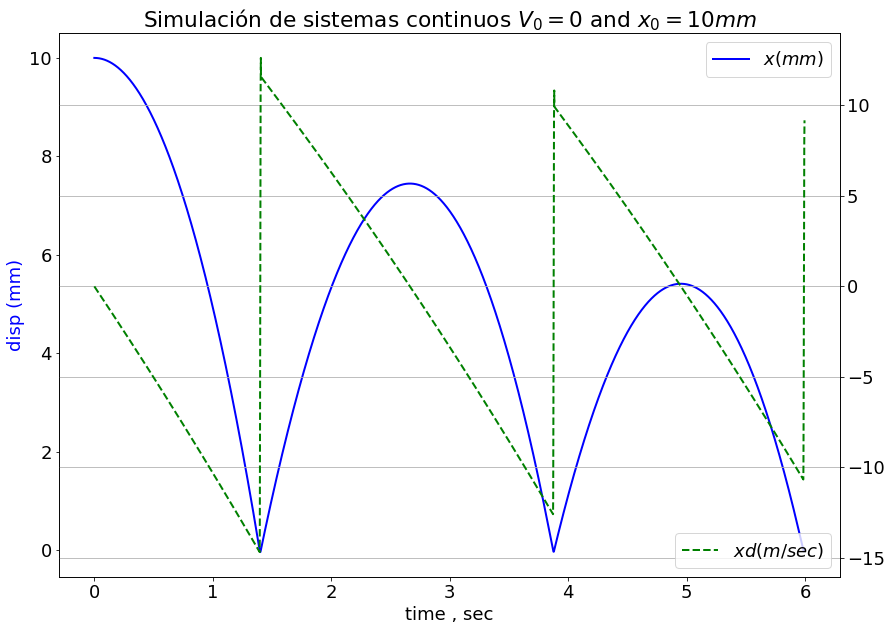

In [208]:
df_definitivo = main_simulacion()
df_definitivo

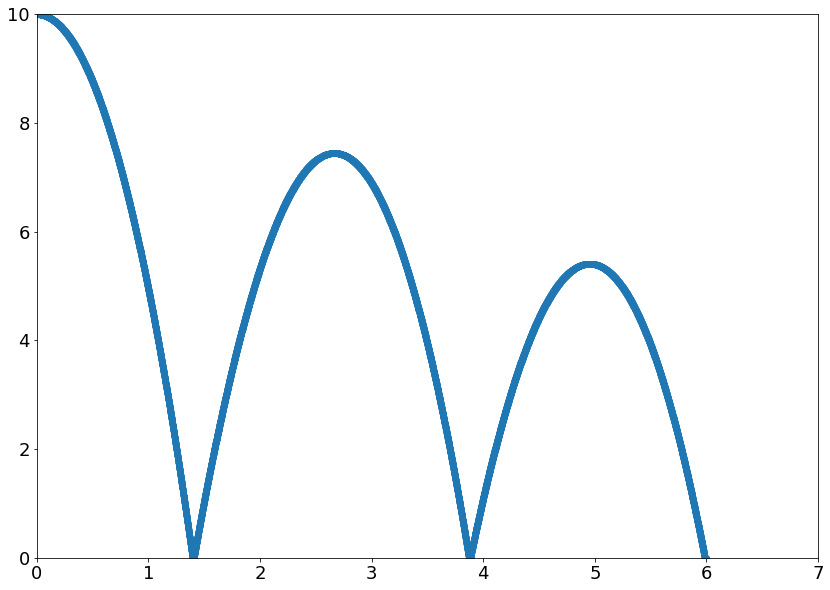

In [211]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
# Ahora la animación:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 7))
ax.set_ylim((0, 10))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = df_definitivo['tiempo']
    y = df_definitivo['posicion']
    
    line.set_marker('h')
    line.set_data(x, y)

    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=10, blit=True)

HTML(anim.to_html5_video())